Jackknife bias estimate on original dataset: 0.008002488358107449
Mean of bias bootstrap samples: 0.00832702853743917
Standard error of Jackknife bias estimate: 0.007631080579909602
Coefficient of variation of bias bootstrap samples: 1.0911991362483833
Jackknife se estimate on original dataset: 0.10552778537998952
Mean of se bootstrap samples: 0.09686395321285152
Standard error of Jackknife se estimate: 0.03196500263072763
Coefficient of variation of se bootstrap samples: 3.0303126932871636


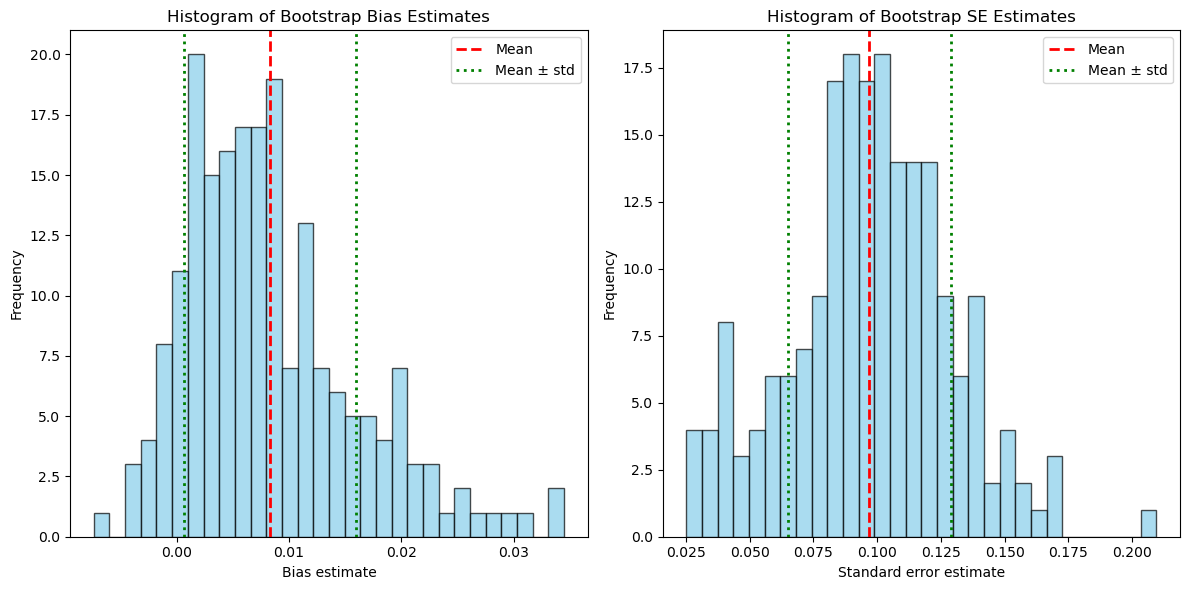

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initial data
Z = np.array([ 8406, 2342, 8187, 8459, 4795, 3516, 4796, 10238 ])
Y = np.array([ -1200, 2601, -2705, 1982, -1290, 351, -638, -2719 ])
N = len(Z)
theta_est = np.mean(Y) / np.mean(Z)

# Number of bootstrap samples
B = 200

# Function to perform the Jackknife procedure and return the bias estimate
def jackknife_bias(Z, Y):
    N = len(Z)
    theta_est = np.mean(Y) / np.mean(Z)
    jackknife_samples = []

    for i in range(N):
        sample_Z = np.delete(Z, i)
        sample_Y = np.delete(Y, i)
        jackknife_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        jackknife_samples.append(jackknife_theta_est)

    jackknife_samples = np.array(jackknife_samples)
    bias_jackknife = (N-1) * (np.mean(jackknife_samples) - theta_est)

    return bias_jackknife

# Function to perform the Jackknife procedure and return the standard error estimate
def jackknife_se(Z, Y):
    N = len(Z)
    theta_est = np.mean(Y) / np.mean(Z)
    jackknife_samples = []

    for i in range(N):
        sample_Z = np.delete(Z, i)
        sample_Y = np.delete(Y, i)
        jackknife_theta_est = np.mean(sample_Y) / np.mean(sample_Z)
        jackknife_samples.append(jackknife_theta_est)

    jackknife_samples = np.array(jackknife_samples)
    se_jackknife = np.sqrt((N-1) * np.mean((jackknife_samples - np.mean(jackknife_samples))**2))

    return se_jackknife

# Perform the Bootstrap procedure to estimate the standard error of the Jackknife bias
bootstrap_bias_samples = []
bootstrap_se_samples = []
for _ in range(B):
    bootstrap_indices = np.random.choice(np.arange(N), size=N)
    sample_Z = Z[bootstrap_indices]
    sample_Y = Y[bootstrap_indices]

    bootstrap_bias_sample = jackknife_bias(sample_Z, sample_Y)
    bootstrap_bias_samples.append(bootstrap_bias_sample)

    bootstrap_se_sample = jackknife_se(sample_Z, sample_Y)
    bootstrap_se_samples.append(bootstrap_se_sample)

# Compute the standard error of the Jackknife bias and se
bootstrap_bias_samples = np.array(bootstrap_bias_samples)
se_bias_jackknife = np.std(bootstrap_bias_samples)
mean_bias_bootstrap_samples = np.mean(bootstrap_bias_samples)
cv_bias_bootstrap_samples = se_bias_jackknife / mean_bias_bootstrap_samples

bootstrap_se_samples = np.array(bootstrap_se_samples)
se_se_jackknife = np.std(bootstrap_se_samples)
mean_se_bootstrap_samples = np.mean(bootstrap_se_samples)
cv_se_bootstrap_samples = se_se_jackknife /  mean_se_bootstrap_samples

# Compute the Jackknife bias and se estimate for the original dataset
bias_jackknife = jackknife_bias(Z, Y)
se_jackknife = jackknife_se(Z, Y)

# Print the values
print(f'Jackknife bias estimate on original dataset: {bias_jackknife}')
print(f'Mean of bias bootstrap samples: {mean_bias_bootstrap_samples}')
print(f'Standard error of Jackknife bias estimate: {se_bias_jackknife}')
print(f'Coefficient of variation of bias bootstrap samples: {cv_bias_bootstrap_samples}')

print(f'Jackknife se estimate on original dataset: {se_jackknife}')
print(f'Mean of se bootstrap samples: {mean_se_bootstrap_samples}')
print(f'Standard error of Jackknife se estimate: {se_se_jackknife}')
print(f'Coefficient of variation of se bootstrap samples: {cv_se_bootstrap_samples}')

# Plot the histogram of bootstrap samples
plt.figure(figsize=(12,6))

# Bias estimate
plt.subplot(1, 2, 1)
plt.hist(bootstrap_bias_samples, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_bias_bootstrap_samples, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_bias_bootstrap_samples - se_bias_jackknife, color='green', linestyle='dotted', linewidth=2, label='Mean ± std')
plt.axvline(mean_bias_bootstrap_samples + se_bias_jackknife, color='green', linestyle='dotted', linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Bias estimate')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap Bias Estimates')

# Se estimate
plt.subplot(1, 2, 2)
plt.hist(bootstrap_se_samples, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.axvline(mean_se_bootstrap_samples, color='red', linestyle='dashed', linewidth=2, label='Mean')
plt.axvline(mean_se_bootstrap_samples - se_se_jackknife, color='green', linestyle='dotted', linewidth=2, label='Mean ± std')
plt.axvline(mean_se_bootstrap_samples + se_se_jackknife, color='green', linestyle='dotted', linewidth=2)
plt.legend(loc='upper right')
plt.xlabel('Standard error estimate')
plt.ylabel('Frequency')
plt.title('Histogram of Bootstrap SE Estimates')

plt.tight_layout()
plt.show()
